## Project Name :- Exploratory Data Analysis on Dataset - Terrorism (LGM task-2.1)
#### Hey in this project I did the analysis and try to find out the hot zone of terrorism using python.
___

 **Author :** Gaurav R. Bhasme  
 **Email :** gauravbhasme1461gb@gmail.com  
 **Github :**   
 **Data  Analytics Internship**   
 **LGM(VIP) JAN 2022**
 ---

# Exploratory Data Analysis
Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
___

In [28]:
# Importing all the important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
%matplotlib inline

## Loading Dataset
The dataset is available at https://bit.ly/2TK5Xn5

The Global Terrorism dataset consists of 181691 records with 135 columns.
___

In [3]:
df=pd.read_csv('Terrorfinal.csv')

C:\Users\gaura\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [10]:
df.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
df.shape

(181691, 135)

In [12]:
# Check Missing and Null Values
print(df.isnull().sum())
print("Total number of null values =", df.isnull().sum().sum())

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64
Total number of null values = 13853997


In [13]:
# Dataset Types
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [15]:
# Dataset Statistical Description
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


## Data Pre-processing
In data pre-processing, renaming of column names is carried out for better accecibility of the columns.

A new dataset is created using only required columns from the original dataset. The shape of new dataset is 181691 rows and 19 columns.
***

In [22]:
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day',
                   'extended':'Extended', 'country_txt':'Country',
                   'provstate':'state', 'region_txt':'Region',
                   'attacktype1_txt':'AttackType', 'target1':'Target',
                   'nkill':'Killed', 'nwound':'Wounded', 'summary':'Summary',
                   'gname':'Group', 'targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type', 'motive':'Motive'}, inplace=True)

In [23]:
new_df = df[['Year','Month','Extended','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [24]:
new_df.shape

(181691, 19)

In [25]:
new_df.columns

Index(['Year', 'Month', 'Extended', 'Day', 'Country', 'state', 'Region',
       'city', 'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded',
       'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

## Correlation Analysis
Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Both NA and null values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
___

In [29]:
# Correlation Analysis
corr_mat = new_df.corr()
corr_mat

,Year,Month,Extended,Day,latitude,longitude,Killed,Wounded
Year,1.000000,0.000139,0.091754,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,-0.000468,0.005497,-0.015978,-0.003880,0.003463,0.002938
Extended,0.091754,-0.000468,1.000000,-0.004700,-0.024749,0.000523,0.027737,-0.006627
Day,0.018254,0.005497,-0.004700,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,-0.024749,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,0.000523,-0.002285,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,0.027737,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.006627,-0.001268,0.015988,0.000223,0.534375,1.000000


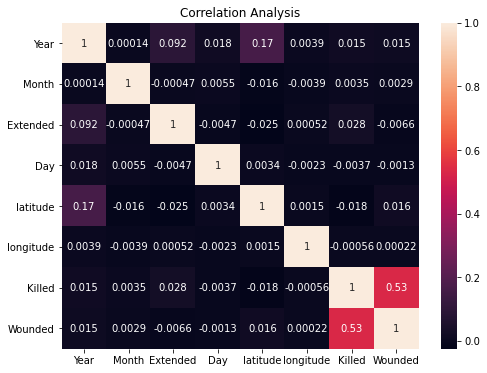

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Analysis')
plt.savefig('correlation.png')
plt.show()

## Covariance
Pandas dataframe.cov() is used to compute the pairwise covariance among the series of a DataFrame. The returned data frame is the covariance matrix of the columns of the DataFrame.

Both NA and null values are automatically excluded from the calculation. A threshold can be set for the minimum number of observations for each value created. Comparisons with observations below this threshold will be returned as NaN.

In [31]:
# Covariance Analysis
cov_mat = new_df.cov()
cov_mat

,Year,Month,Extended,Day,latitude,longitude,Killed,Wounded
Year,175.812496,0.006242,0.253131,2.133346,40.951530,1.059590e+04,2.292652,7.019333
Month,0.006242,11.480600,-0.000330,0.164158,-1.005279,-2.692110e+03,0.135442,0.357870
Extended,0.253131,-0.000330,0.043290,-0.008619,-0.094911,2.213697e+01,0.059391,-0.043013
Day,2.133346,0.164158,-0.008619,77.687385,0.559877,-4.120870e+03,-0.375477,-0.401569
latitude,40.951530,-1.005279,-0.094911,0.559877,344.816764,5.564253e+03,-3.822593,10.634340
longitude,10595.897714,-2692.109846,22.136973,-4120.870170,5564.252921,4.193443e+10,-1358.855169,1740.424297
Killed,2.292652,0.135442,0.059391,-0.375477,-3.822593,-1.358855e+03,133.304125,188.711482
Wounded,7.019333,0.357870,-0.043013,-0.401569,10.634340,1.740424e+03,188.711482,1292.358771


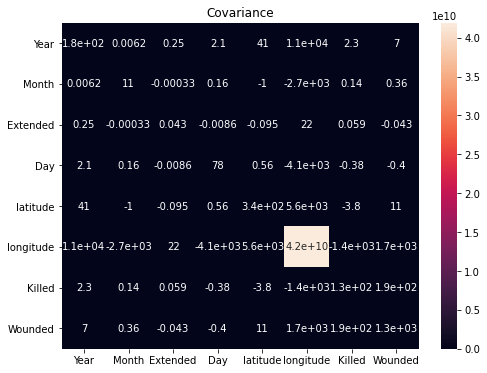

In [32]:
fig,axes = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(cov_mat, annot=True)
plt.title('Covariance')
plt.savefig('covariance.png')
plt.show()

## Visualizing Data
**Pie chart :** Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

**Heatmap :** Heat map is used to find out the correlation between different features in the dataset. High positive or negative value shows that the features have high correlation.

**Histogram :** A histogram shows the frequency on the vertical axis and the horizontal axis is another dimension. Usually it has bins, where every bin has a minimum and maximum value. Each bin also has a frequency between x and infinite.

**CountPlot :** A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

**Choropleth Map :** A Choropleth Map is a map composed of colored polygons. It is used to represent spatial variations of a quantity. This page documents how to build outline choropleth maps, but you can also build choropleth tile maps using our Mapbox trace types.

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Extended'}>],
       [<AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'Killed'}>,
        <AxesSubplot:title={'center':'Wounded'}>, <AxesSubplot:>]],
      dtype=object)

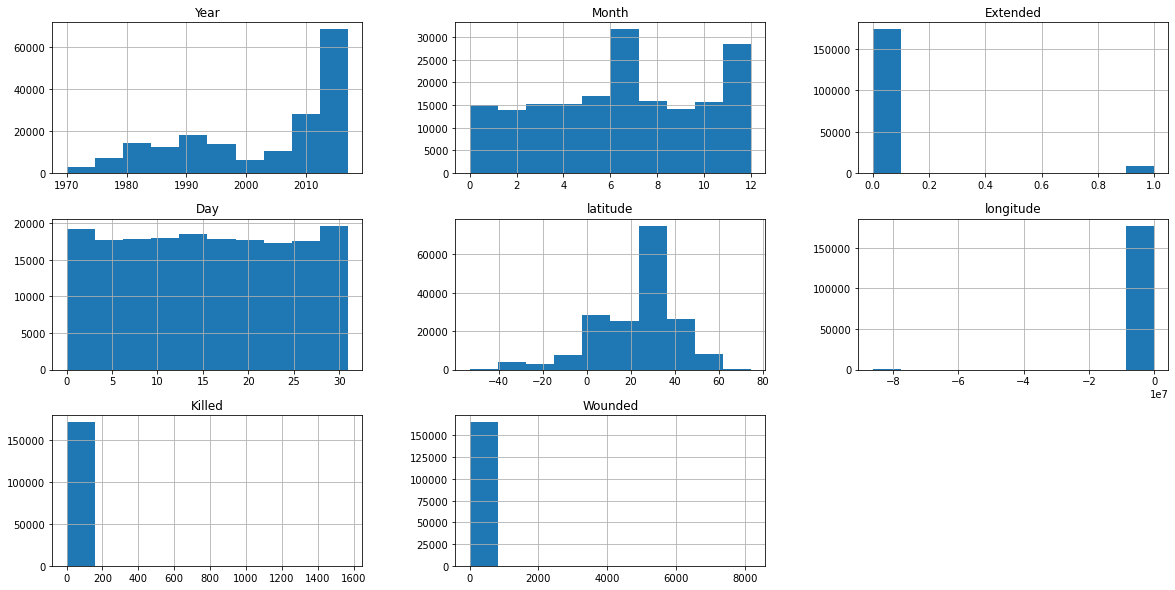

In [33]:
new_df.hist(figsize=(20,10))

In [35]:
# Increase in Attacks in years
Year = new_df.Year.value_counts().to_dict()
rate = ((Year[2017] - Year[1970]) / Year[2017]) * 100
print(Year[1970],'attacks happened in 1970')
print(Year[2017],'attacks happened in 2017')
print('Total number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

651 attacks happened in 1970
10900 attacks happened in 2017
Total number of attacks from 1970 has increased by 94.0 % till 2017


## Top 10 Countries with most attacks

In [36]:
# Top 10 Countries with most attacks
print('Top 10 Countries with most attacks')
print('-----------------------------------')
print(new_df['Country'].value_counts().head(10))

Top 10 Countries with most attacks
-----------------------------------
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



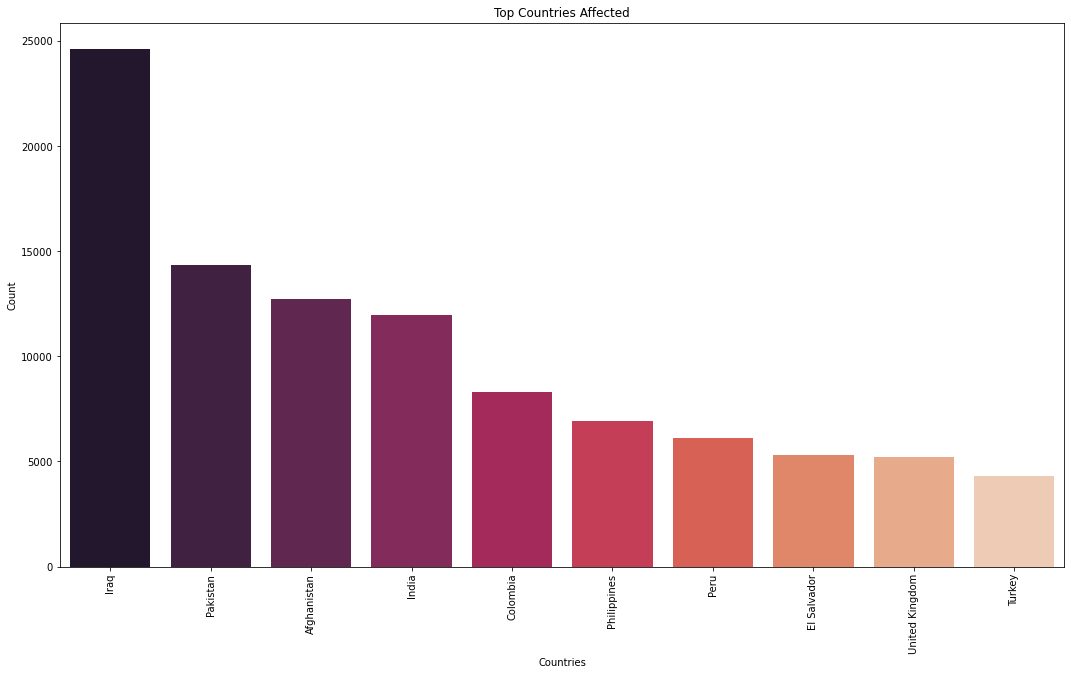

In [37]:
#Top Countries affected by Terror Attacks
plt.subplots(figsize=(18,10))
sns.barplot(new_df['Country'].value_counts()[:10].index, new_df['Country'].value_counts()[:10].values,palette='rocket')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.title('Top Countries Affected')
plt.savefig('top10_Countries.png')
plt.show()

## Top 10 Cities with most attacks

In [38]:
print('Top 10 Cities with the most attacks')
print('-----------------------------------')
print(new_df['city'].value_counts().head(10))

Top 10 Cities with the most attacks
-----------------------------------
Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64


C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



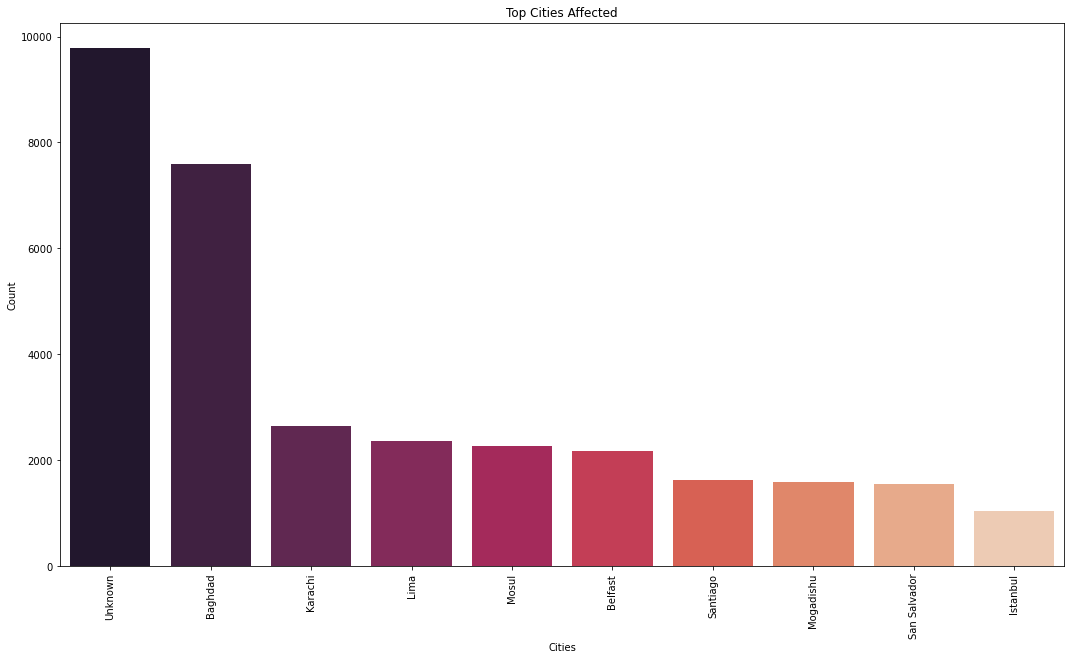

In [39]:
#Top Cities affected by Terror Attacks
plt.subplots(figsize=(18,10))
sns.barplot(new_df['city'].value_counts()[:10].index, new_df['city'].value_counts()[:10].values,palette='rocket')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.title('Top Cities Affected')
plt.savefig('top10_Cities.png')
plt.show()

## Top 10 Regions with most attacks

In [40]:
print('Top 10 Regions with the most attacks')
print('-----------------------------------')
print(new_df['Region'].value_counts())

Top 10 Regions with the most attacks
-----------------------------------
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64


C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



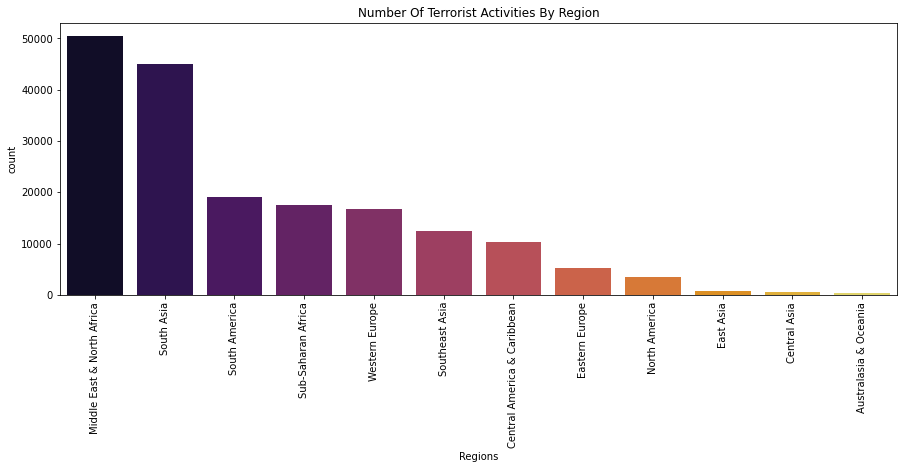

In [41]:
plt.subplots(figsize=(15,5))
sns.countplot('Region', data=new_df, palette='inferno', order=new_df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.savefig('top_Regions.png')
plt.show()

### Terrorist Activies by Region in Each Year

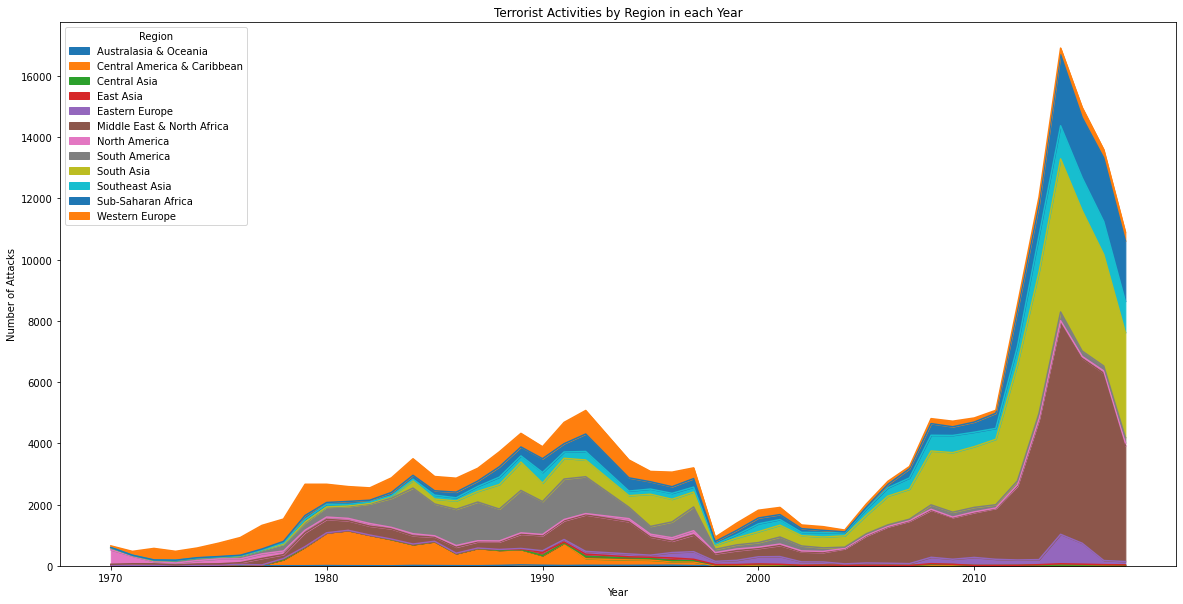

In [42]:
pd.crosstab(new_df.Year, new_df.Region).plot(kind='area', figsize=(20,10))
plt.ylabel('Number of Attacks')
plt.title('Terrorist Activities by Region in each Year')
plt.savefig('yearly_RegionWiseIncrease.png')
plt.show()


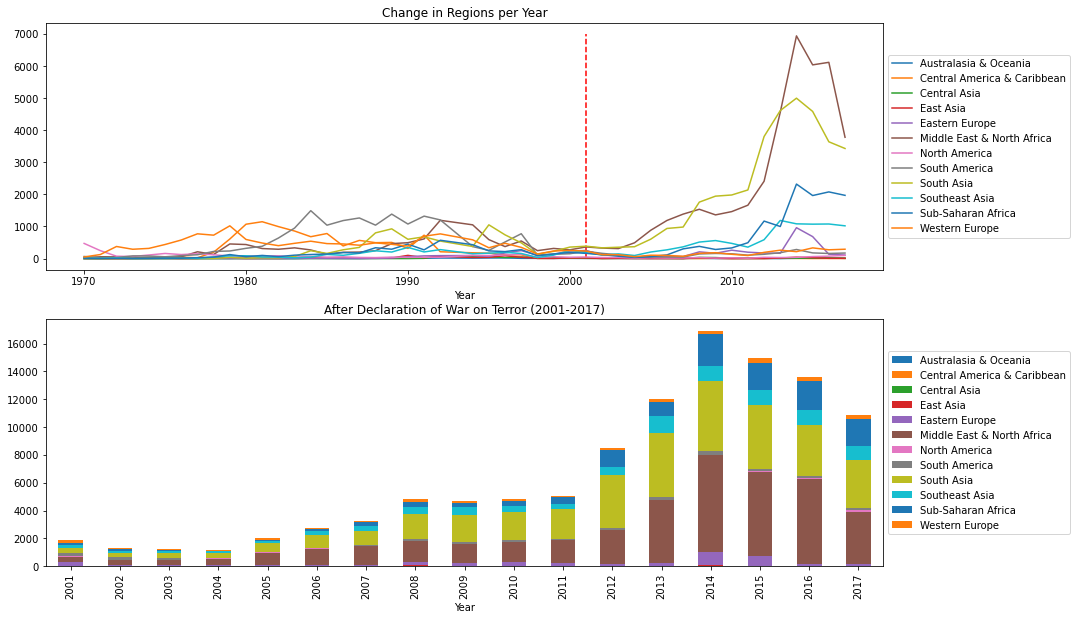

In [43]:
data_after = new_df[new_df['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10), nrows=2, ncols=1)
ax[0] = pd.crosstab(new_df.Year, new_df.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')

pd.crosstab(data_after.Year, data_after.Region).plot.bar(stacked=True, ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.savefig('yearly_RegionwiseChange.png')
plt.show()

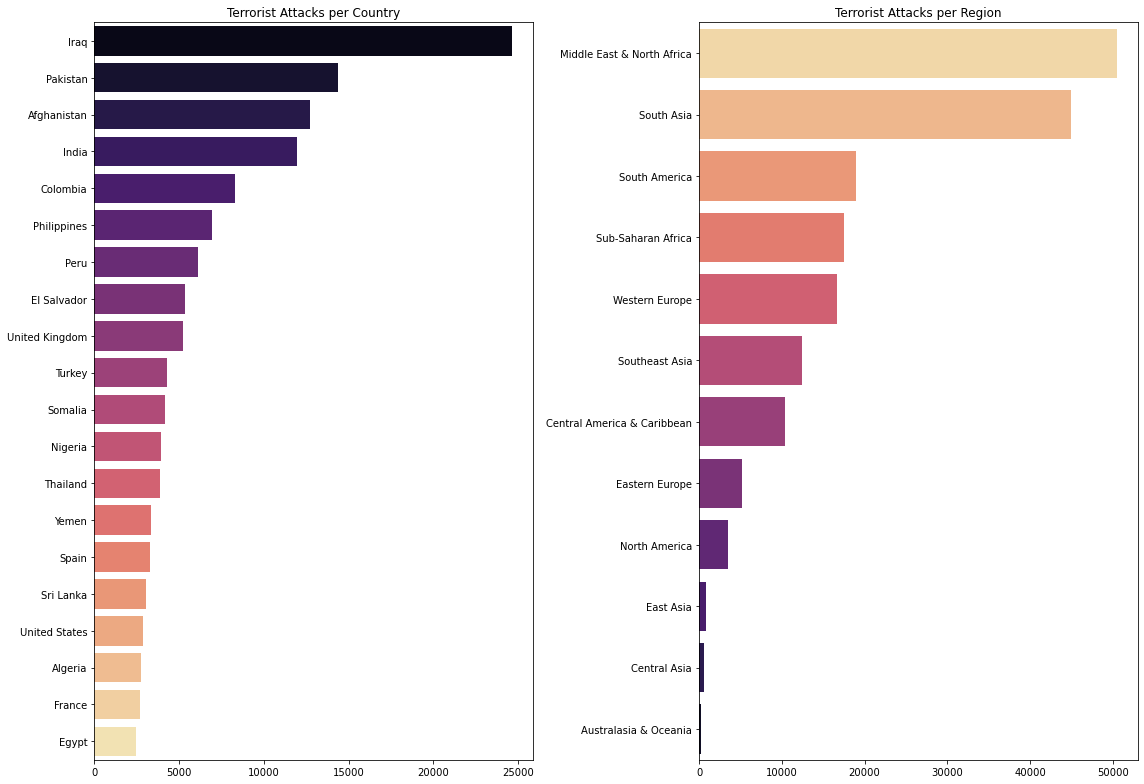

In [44]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = new_df['Country'].value_counts()[:20].values, y = new_df['Country'].value_counts()[:20].index, 
            ax=axes[0],palette='magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=new_df['Region'].value_counts().values, y=new_df['Region'].value_counts().index,
            ax=axes[1],palette='magma_r')
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.savefig('terroristAttacks_Countries_Regions.png')
plt.show()

In [45]:
print('Country with Highest Terrorist Attacks:', new_df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:', new_df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:', new_df['Killed'].max(),'that took place in', new_df.loc[df['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


### Years with most attacks

In [46]:
print('Year with the most attacks')
print('-----------------------------------')
print(new_df['Year'].value_counts().head(10))

Year with the most attacks
-----------------------------------
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64


In [47]:
print("Year with the most attacks:", new_df['Year'].value_counts().idxmax())

Year with the most attacks: 2014


C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



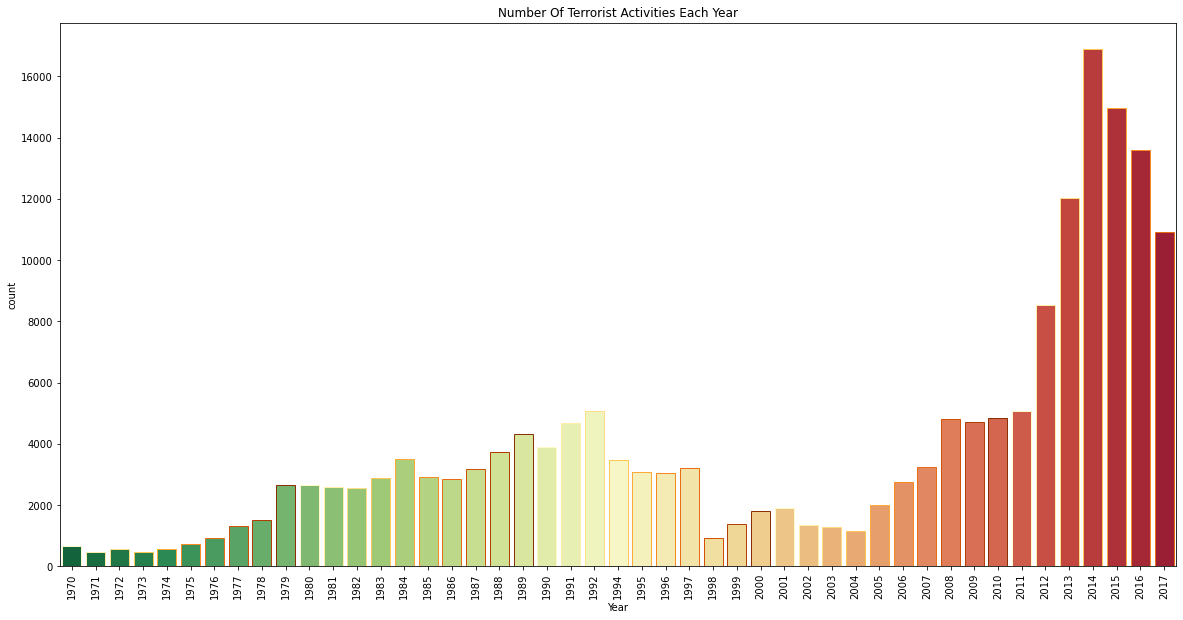

In [48]:
plt.subplots(figsize=(20,10))
sns.countplot('Year', data=new_df,palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.savefig('terroristActivities_Years.png')
plt.show()

#### Months with most attacks

In [49]:
print('Month with the most attacks')
print('-----------------------------------')
print(new_df['Month'].value_counts().head(12))

Month with the most attacks
-----------------------------------
5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
Name: Month, dtype: int64


**Top 10 Groups with most attacks**

In [50]:
print("Top 10 Group with the most attacks")
print('-----------------------------------')
print(new_df['Group'].value_counts().head(10))

Top 10 Group with the most attacks
-----------------------------------
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64


In [51]:
print("Group with the most attacks:",new_df['Group'].value_counts().index[1])

Group with the most attacks: Taliban


C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



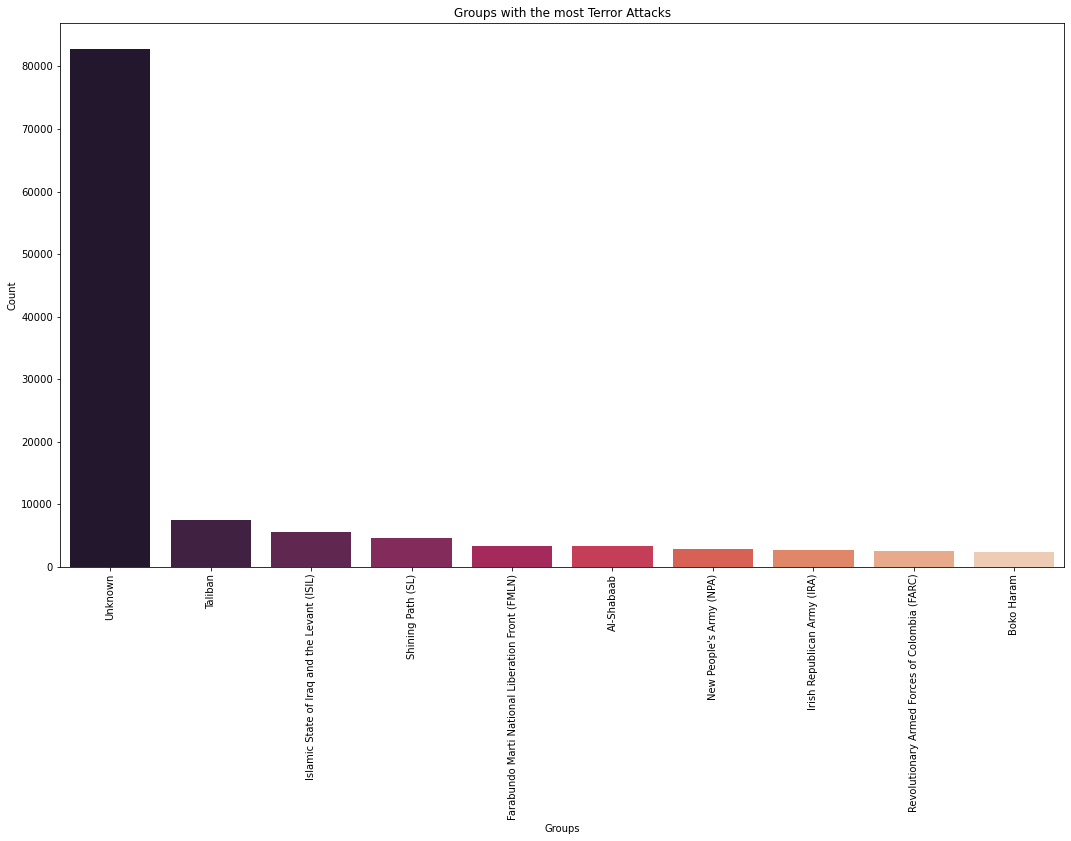

In [52]:
#Top Groups with the most Terror Attacks
plt.subplots(figsize=(18,10))
sns.barplot(new_df['Group'].value_counts()[:10].index, new_df['Group'].value_counts()[:10], palette='rocket')
plt.title('Groups with the most Terror Attacks')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.savefig('top10_TerroristGroups.png')
plt.show()

**Most Attack Types**

In [53]:
print("Most Attack Types")
print('-----------------------------------')
print(new_df['AttackType'].value_counts())

Most Attack Types
-----------------------------------
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


In [54]:
print("Most Attack Types")
print('-----------------------------------')
print(new_df['AttackType'].value_counts())

Most Attack Types
-----------------------------------
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


**Most used Weapon Types**

In [55]:
print("Most used Weapon Types")
print('-----------------------------------')
print(new_df['Weapon_type'].value_counts())

Most used Weapon Types
-----------------------------------
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiol

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



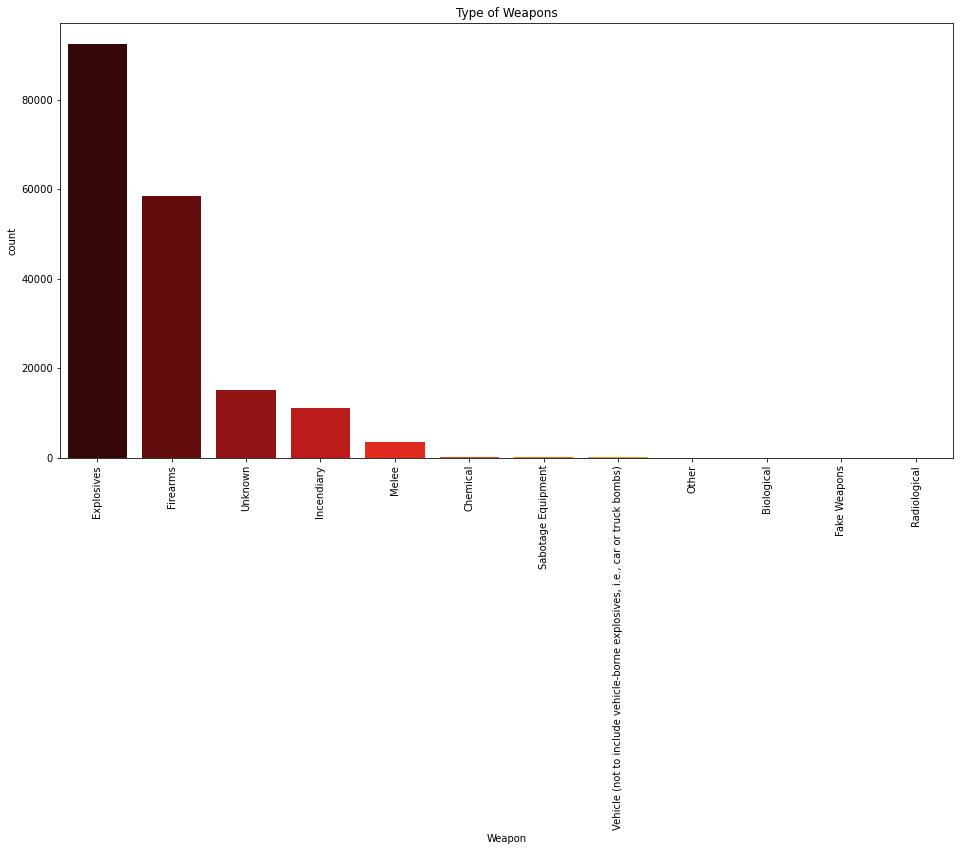

In [56]:
plt.figure(figsize=(16,8))
sns.countplot(new_df['Weapon_type'], order=new_df['Weapon_type'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Weapon')
plt.title('Type of Weapons')
plt.savefig('top_WeaponTypes.png')
plt.show()

**Most Target Types**

In [57]:
print("Most Target Types")
print('-----------------------------------')
print(new_df['Target_type'].value_counts())

Most Target Types
-----------------------------------
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64


In [58]:
print("Most Target Types")
print('-----------------------------------')
print(new_df['Target_type'].value_counts())

Most Target Types
-----------------------------------
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64


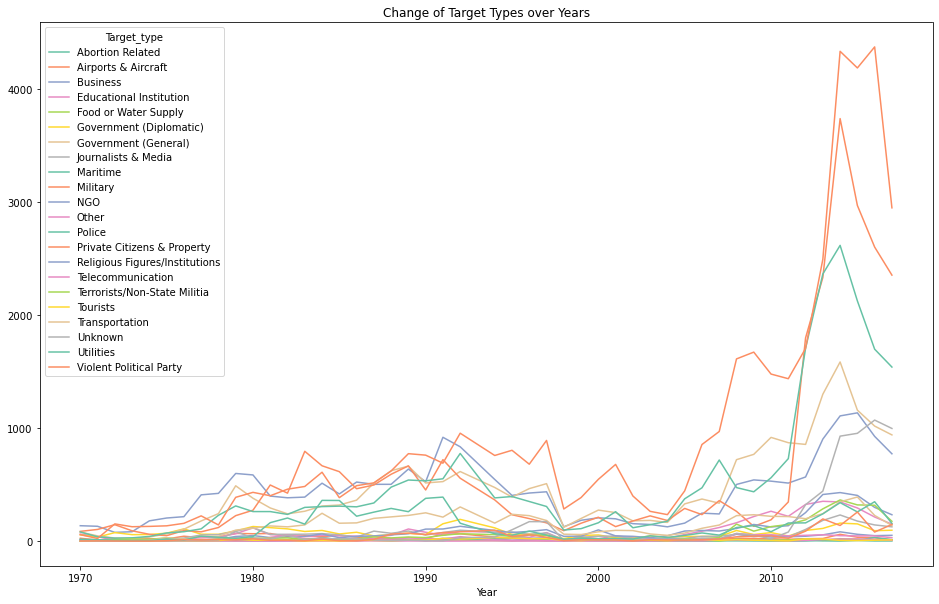

In [59]:
df_region=pd.crosstab(new_df.Year, new_df.Target_type)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.title('Change of Target Types over Years')
plt.savefig('yearly_TargetTypeChange.png')
plt.show()

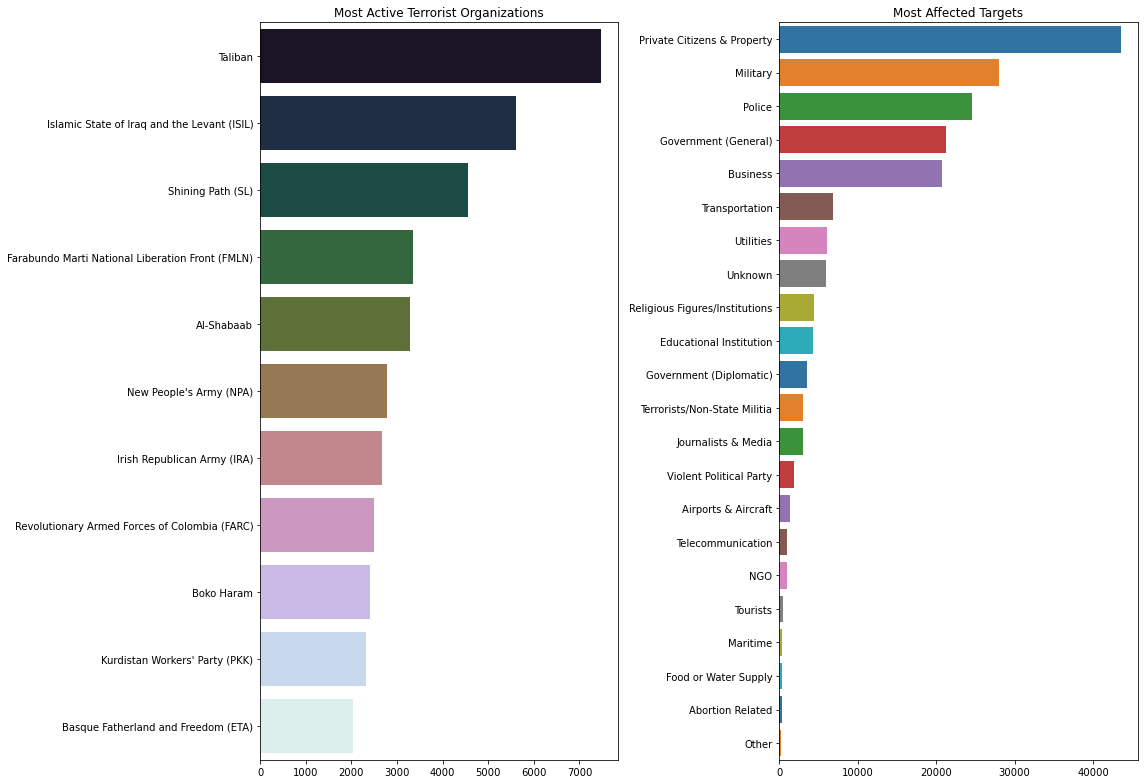

In [60]:
fig,axes = plt.subplots(figsize=(16,11), nrows=1, ncols=2)
sns.barplot(y=new_df['Group'].value_counts()[1:12].index, 
            x=new_df['Group'].value_counts()[1:12].values, 
            ax=axes[0], palette='cubehelix')
axes[0].set_title('Most Active Terrorist Organizations')

#Most affected targets
sns.barplot(y=df['Target_type'].value_counts().index,
            x=df['Target_type'].value_counts().values,
            ax=axes[1], palette='tab10')
axes[1].set_title('Most Affected Targets')
fig.tight_layout()
plt.show()

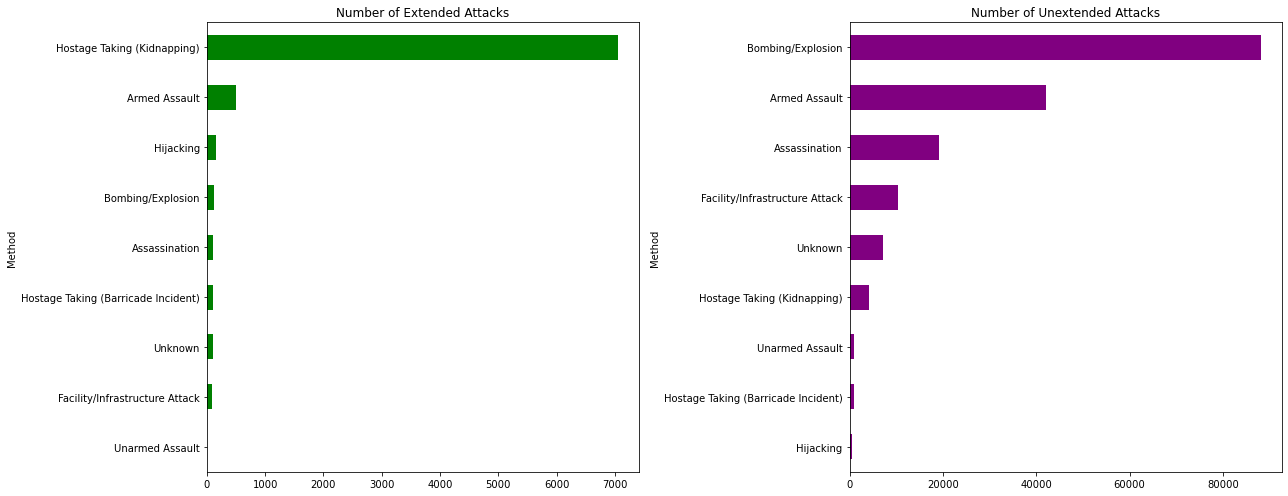

In [61]:
fig,ax = plt.subplots(figsize=(18,7),nrows=1,ncols=2)
ax[0]=new_df[new_df['Extended']==1].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='green',ax=ax[0])
ax[1]=new_df[new_df['Extended']==0].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='purple',ax=ax[1])
ax[0].set_title('Number of Extended Attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()

# THANK YOU